# Plots without High-K

**To-do List for Figures**
- Make gif of potential gradients with all nitride changing as the applied voltage changes
    - Field plate
    - T gate
- Benchmark IV performance out to larger value (+4V) and compare on a chart
- Benchmark peak field and compare on a chart
- Show channel plot for both field plate and T gate to illustrate when and where the peak field location changes

## Definitions

In [43]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid') # One of the two of these styles will work. not sure why it changes.
#plt.style.use('seaborn-darkgrid')
# print(plt.style.available)
import numpy as np

In [44]:
def plotFromFlooxs(IVFile, peakFile):
    
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Gate = IVFile[:,0]
    I = IVFile[:,1]

    plt.figure(figsize=[14,7]);
    plt.subplot(1,2,1)
    plt.plot(Gate, I);
    plt.title("IV")
    plt.xlabel("$V_{G} (V)$");
    plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
    plt.grid(True);

    # =============================================
    #                 Peak Field
    # =============================================
    
    peakFile = np.loadtxt(peakFile, delimiter=',')    
    Vds = peakFile[:,0]
    peakField = peakFile[:,1]

    plt.subplot(1,2,2);
    plt.plot(Vds, peakField);
    plt.title("GaN Peak Field")
    plt.xlabel("$V_{DS} (V)$");
    plt.ylabel("Electric Field (V/cm)");
    plt.grid(True);

    return Gate, I, Vds, peakField

def flooxsRead(IVFile):
    IVFile = np.loadtxt(IVFile, delimiter=',')    
    Vds = IVFile[:,0]
    I = IVFile[:,1]
    return Vds,I

## Fieldplate
The plot below contains the I-V benchmark and the peak field in the GaN (in the channel) with no High-K dielectric for the field plate transistor

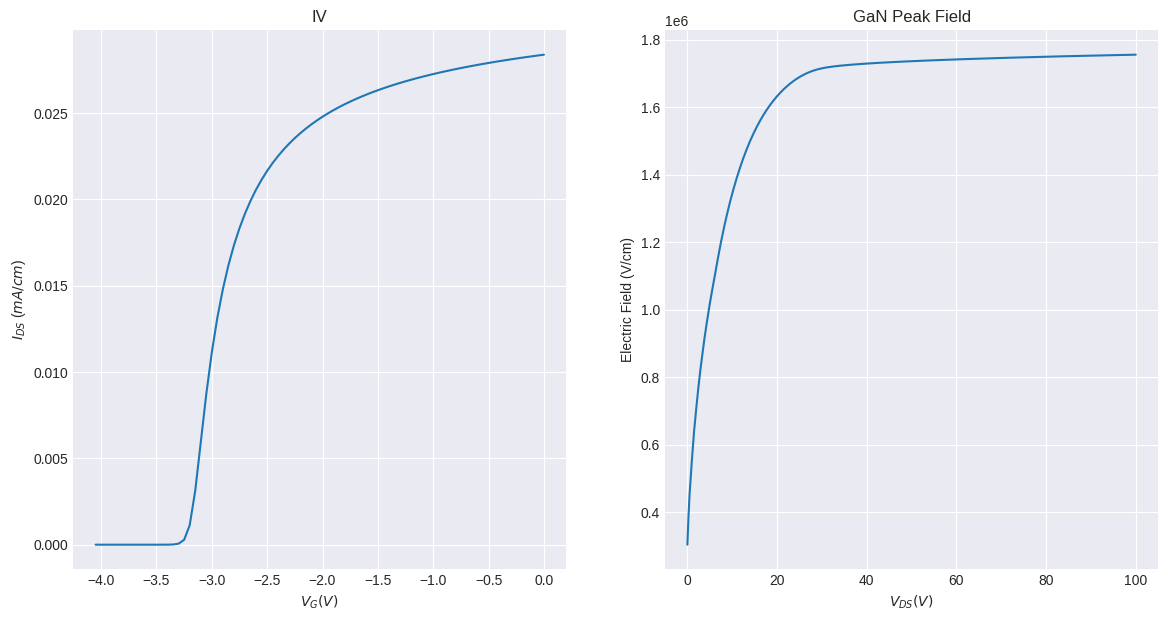

In [45]:
Gate, I, Vds, peakField = plotFromFlooxs("/home/staffian/banjo-wombat/fieldplate/IV.csv","/home/staffian/banjo-wombat/fieldplate/peak.csv")

The second plot below is an expanded look at the fieldplate IV characteristics, with $V_g$ going to 4V

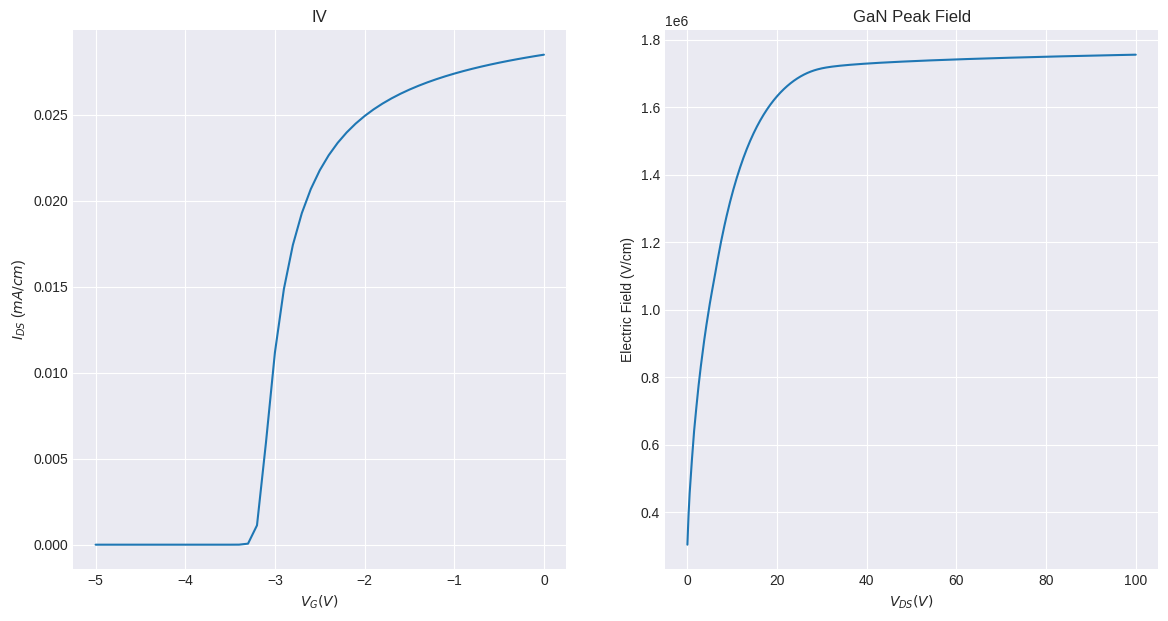

In [46]:
Gate_t, I_t, Vds_t, peakField_t = plotFromFlooxs("/home/staffian/banjo-wombat/fieldplate/IV_run2.csv","/home/staffian/banjo-wombat/fieldplate/peak.csv")


## T-gate
The plot below contains the I-V benchmark and the peak field in the GaN (in the channel) with no High-K dielectric for the T-gate transistor

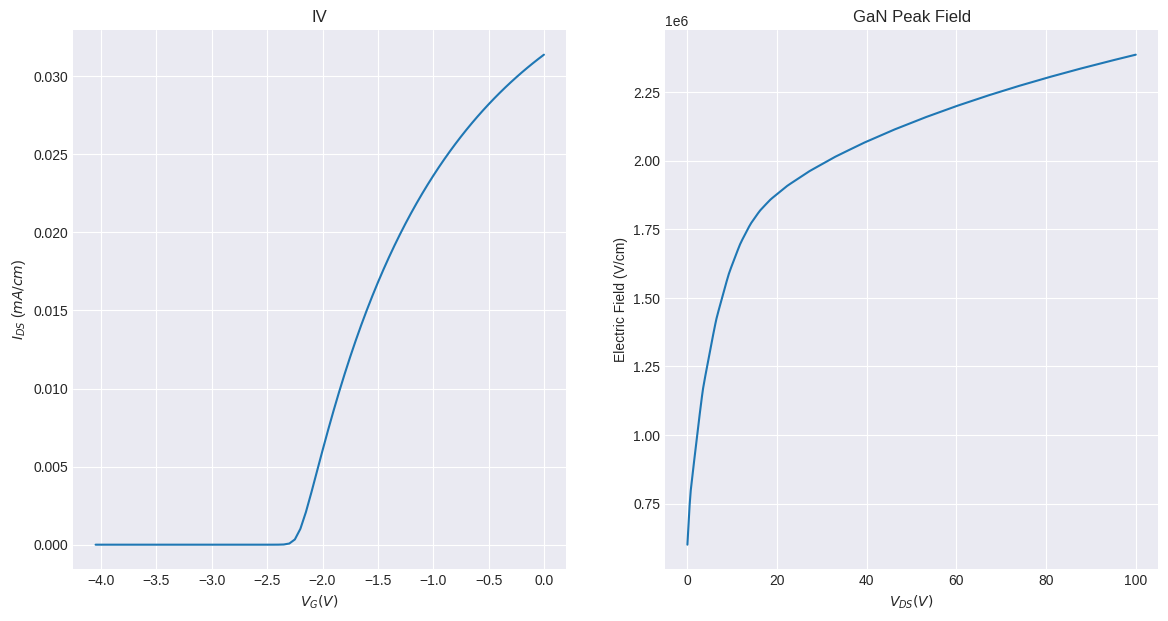

In [47]:
Gate_t, I_t, Vds_t, peakField_t = plotFromFlooxs("/home/staffian/banjo-wombat/newTgate/IV.csv","/home/staffian/banjo-wombat/newTgate/peak.csv")

Presumably we see the discontinuities in the peak field plot because the location of peak field in the GaN changes. A channel field plot at 0, 25, 50, 75, and 100 can help us see the difference.

Also, it appears that the device is not in saturation at 0V. I will run this out to +/- 4V to see what the curves look like, then plot each transistor's curve together to get a good idea of what the performance difference looks like. I will do this for the peak field as well (0-100V)

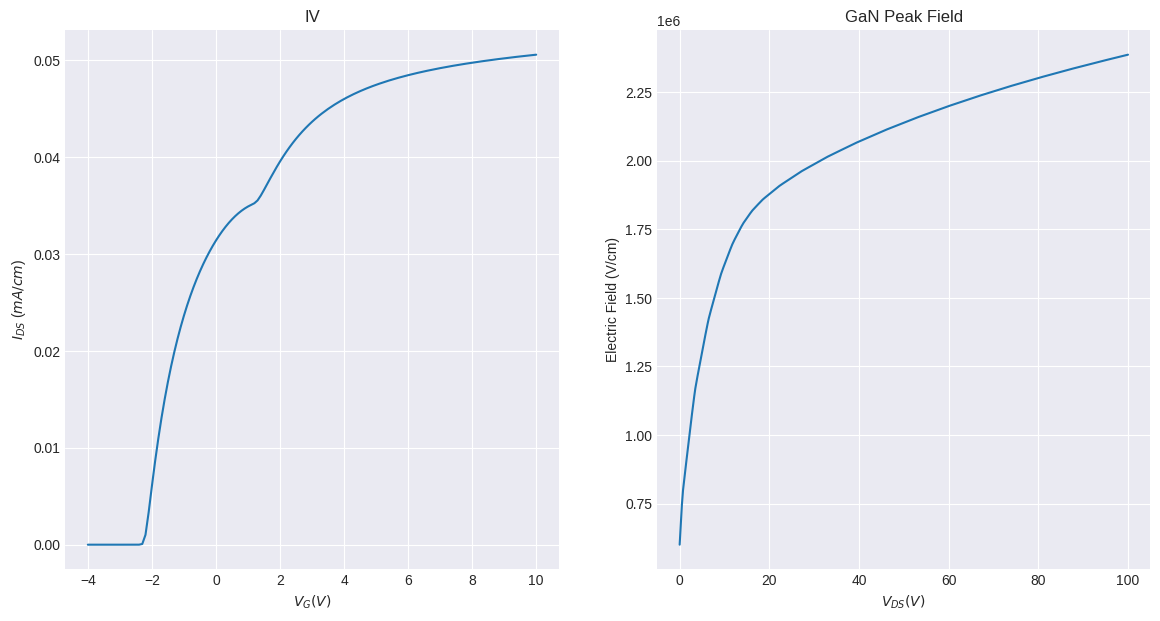

In [48]:
Gate_t, I_t, Vds_t, peakField_t = plotFromFlooxs("/home/staffian/banjo-wombat/newTgate/IV_run2.csv","/home/staffian/banjo-wombat/newTgate/peak.csv")

## April 10
Vds/Id curves at varying Vds. Tuned schottky barrier height individually for the values 

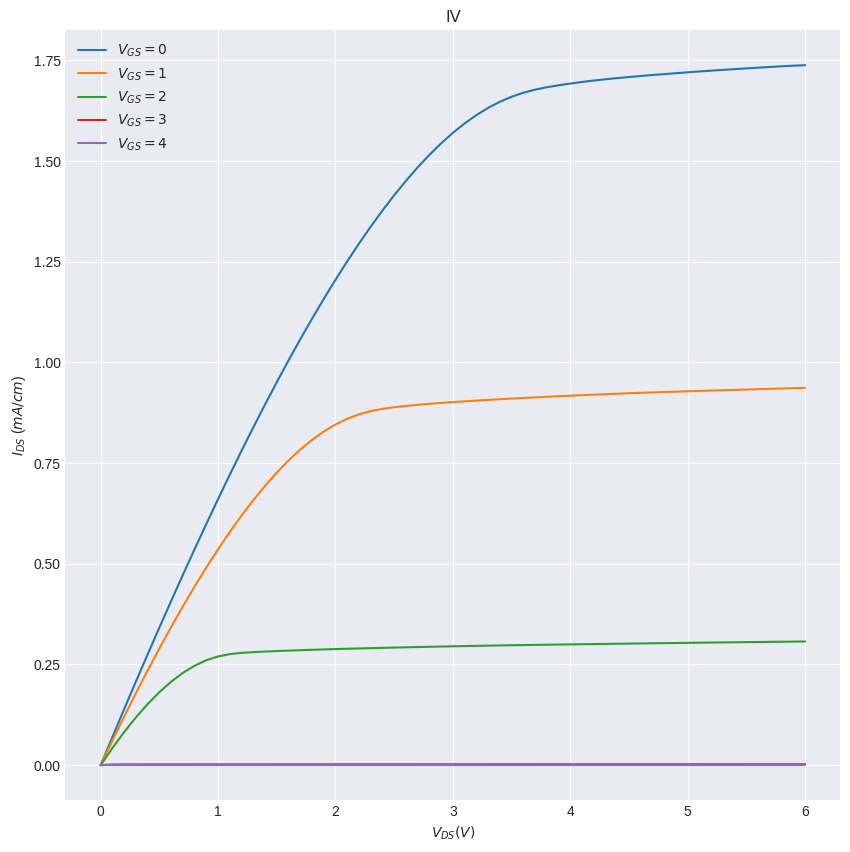

In [50]:
tgate_Vds_0, tgate_Ids_0 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV0")
tgate_Vds_1, tgate_Ids_1 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV1")
tgate_Vds_2, tgate_Ids_2 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV2")
tgate_Vds_3, tgate_Ids_3 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV3")
tgate_Vds_4, tgate_Ids_4 = flooxsRead("/home/staffian/banjo-wombat/allNit/newIV4")

plt.figure(figsize=[10,10]);
plt.plot(tgate_Vds_0, tgate_Ids_0, label="$V_{GS}=0$");
plt.plot(tgate_Vds_1, tgate_Ids_1, label="$V_{GS}=1$");
plt.plot(tgate_Vds_2, tgate_Ids_2, label="$V_{GS}=2$");
plt.plot(tgate_Vds_3, tgate_Ids_3, label="$V_{GS}=3$");
plt.plot(tgate_Vds_4, tgate_Ids_4, label="$V_{GS}=4$");
plt.title("IV")
plt.xlabel("$V_{DS} (V)$");
plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
plt.grid(True);
plt.legend();

## Fieldplate Vds/Ids Plot

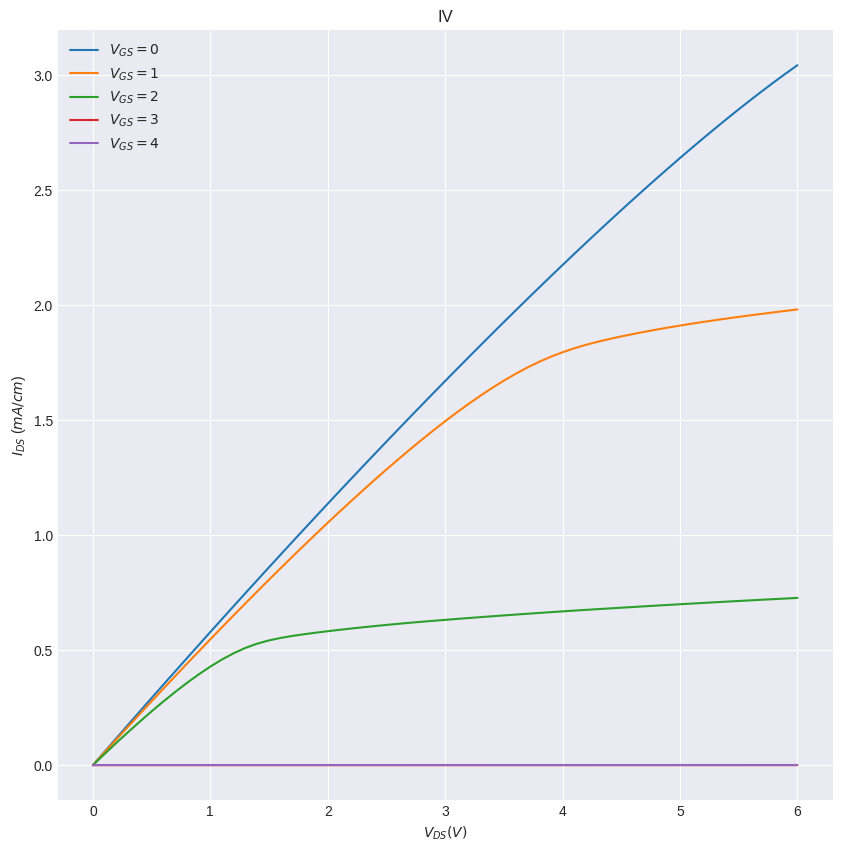

In [51]:
tgate_Vds_0, tgate_Ids_0 = flooxsRead("/home/staffian/banjo-wombat/allNit/fpIV0")
tgate_Vds_1, tgate_Ids_1 = flooxsRead("/home/staffian/banjo-wombat/allNit/fpIV1")
tgate_Vds_2, tgate_Ids_2 = flooxsRead("/home/staffian/banjo-wombat/allNit/fpIV2")
tgate_Vds_3, tgate_Ids_3 = flooxsRead("/home/staffian/banjo-wombat/allNit/fpIV3")
tgate_Vds_4, tgate_Ids_4 = flooxsRead("/home/staffian/banjo-wombat/allNit/fpIV4")

plt.figure(figsize=[10,10]);
plt.plot(tgate_Vds_0, tgate_Ids_0, label="$V_{GS}=0$");
plt.plot(tgate_Vds_1, tgate_Ids_1, label="$V_{GS}=1$");
plt.plot(tgate_Vds_2, tgate_Ids_2, label="$V_{GS}=2$");
plt.plot(tgate_Vds_3, tgate_Ids_3, label="$V_{GS}=3$");
plt.plot(tgate_Vds_4, tgate_Ids_4, label="$V_{GS}=4$");
plt.title("IV")
plt.xlabel("$V_{DS} (V)$");
plt.ylabel("$I_{DS}$ (${mA}/{cm}$)");
plt.grid(True);
plt.legend();